In [2]:
import numpy as np
import pylab as pl

from vent.common.loggers import DataLogger

2020-06-08 10:01:24,127 - vent.common.prefs - INFO - Loaded prefs from /Users/ms81/vent/prefs.json
2020-06-08 10:01:24,129 - vent.common.prefs - INFO - Saved prefs to /Users/ms81/vent/prefs.json


In [49]:
dl = DataLogger()                # Get an instance of the data logger, to load compressed hdf5 files


def plot_data(filename):
    """
    Small helper function to translate hdf-file into a plottable list
    """
    dff = dl.load_file(filename) # dff is a dictionary. One can just extract waveform and control data

    ls_wv = dff['waveform_data']
    ls_ct = dff['control_data']
    data = np.zeros((len(ls_wv),2))
    for idx in range(len(ls_wv)):
        data[idx,0] = ls_wv[idx][4]  # time
        data[idx,1] = ls_wv[idx][3]  # pressure
    return data

In [39]:
# Running on the dinky, PEEP=8 with PEEPvalve, PIP=25 with PID
datav = plot_data("../../2020-06-08-11-11_controller_log.0.h5")

# Running on the dinkey, PEEP=8 with PID, PIP=25 with PID
datas = plot_data("../../2020-06-08-11-01_controller_log.0.h5")

# Running on the dinkey, PEEP=8 with PEEPVALVE, PIP = 35 with PID
datam = plot_data("../../2020-06-08-11-17_controller_log.0.h5")

Reading... ../../2020-06-08-11-11_controller_log.0.h5
Reading... ../../2020-06-08-11-01_controller_log.0.h5
Reading... ../../2020-06-08-11-17_controller_log.0.h5


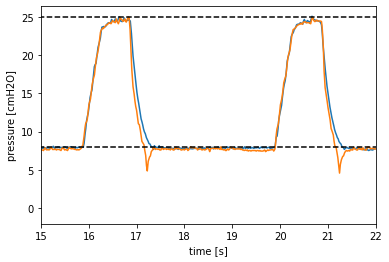

In [40]:
pl.plot(datav[:,0] - np.min(datav[:,0]), datav[:,1])
pl.plot(datas[:,0] - np.min(datas[:,0]), datas[:,1])

pl.plot([0,40],[8,8],'k--')
pl.plot([0,40],[25,25],'k--')
pl.xlim([15,22])
pl.xlabel("time [s]")
pl.ylabel("pressure [cmH2O]");

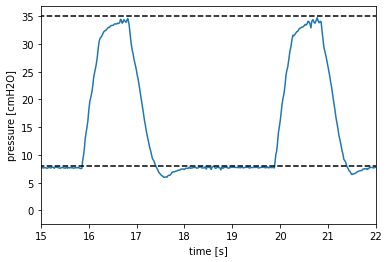

In [41]:
pl.plot(datam[:,0] - np.min(datam[:,0]), datam[:,1])

pl.plot([0,40],[8,8],'k--')
pl.plot([0,40],[35,35],'k--')
pl.xlim([15,22])
pl.xlabel("time [s]")
pl.ylabel("pressure [cmH2O]");

In [ ]:
if this looks good, wire up `self._DATA_Qout = 0 #self.HAL.flow_ex`

In [52]:
# Running on the dinkey, PEEP = PIDCONTROL to 8 in hardware PIP = 35
dffm = dl.load_file("../../2020-06-08-11-31_controller_log.0.h5")
ls_wv = dffm['waveform_data']
ls_ct = dffm['control_data']
datam = np.zeros((len(ls_wv),2))
for idx in range(len(ls_wv)):
    datam[idx,0] = ls_wv[idx][4]
    datam[idx,1] = ls_wv[idx][3]

Reading... ../../2020-06-08-11-31_controller_log.0.h5


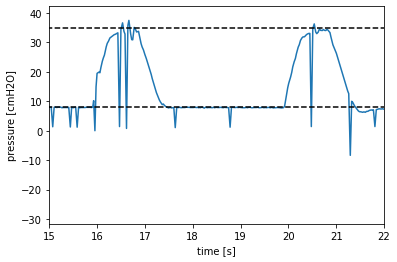

In [53]:
pl.plot(datam[:,0] - np.min(datam[:,0]), datam[:,1])

pl.plot([0,40],[8,8],'k--')
pl.plot([0,40],[35,35],'k--')
pl.xlim([15,22])
pl.xlabel("time [s]")
pl.ylabel("pressure [cmH2O]");